In [1]:
! free -m

              total        used        free      shared  buff/cache   available
Mem:          13029         370        1929         247       10729       12163
Swap:             0           0           0


In [0]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
!ls

datalab  MNIST_data


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


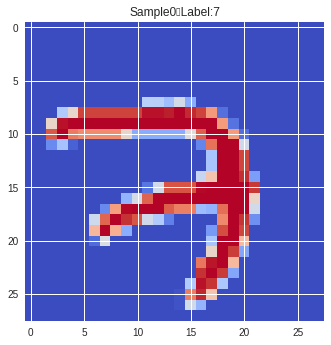

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(mnist.train.labels[num])  
    label = mnist.train.labels[num].argmax(axis=0)
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample' +str(num)+ '\t' + 'Label:'+ str(label))
    plt.imshow(image, cmap=plt.get_cmap('coolwarm'))
    plt.show()
    
display_sample(0)

In [0]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [0]:
hidden_nodes = 32768

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

In [0]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [0]:

loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [0]:
correct_prediction = tf.equal(tf.argmax(digit_weights,1), tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: mnist.test.images, target_labels: mnist.test.labels})))

Training epoch 100
Accuracy: 0.9257
Training epoch 200
Accuracy: 0.9481
Training epoch 300
Accuracy: 0.9455
Training epoch 400
Accuracy: 0.9453
Training epoch 500
Accuracy: 0.9624
Training epoch 600
Accuracy: 0.9579
Training epoch 700
Accuracy: 0.963
Training epoch 800
Accuracy: 0.9688
Training epoch 900
Accuracy: 0.9716
Training epoch 1000
Accuracy: 0.9737
Training epoch 1100
Accuracy: 0.9748
Training epoch 1200
Accuracy: 0.972
Training epoch 1300
Accuracy: 0.9747
Training epoch 1400
Accuracy: 0.9736
Training epoch 1500
Accuracy: 0.9722
Training epoch 1600
Accuracy: 0.9712
Training epoch 1700
Accuracy: 0.9716
Training epoch 1800
Accuracy: 0.9731
Training epoch 1900
Accuracy: 0.9733
Training epoch 2000
Accuracy: 0.9743
